In [7]:
from get_review import ShopeeReviewScraper
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('shopee_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cmtid          337 non-null    int64 
 1   itemid         337 non-null    int64 
 2   rating_star    337 non-null    int64 
 3   comment        95 non-null     object
 4   modelid        337 non-null    int64 
 5   model_name     337 non-null    object
 6   filter         337 non-null    int64 
 7   anonymous      337 non-null    bool  
 8   origin_region  337 non-null    object
 9   region         337 non-null    object
 10  ctime          337 non-null    int64 
 11  submit_time    337 non-null    int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 29.4+ KB


<Axes: xlabel='model_name'>

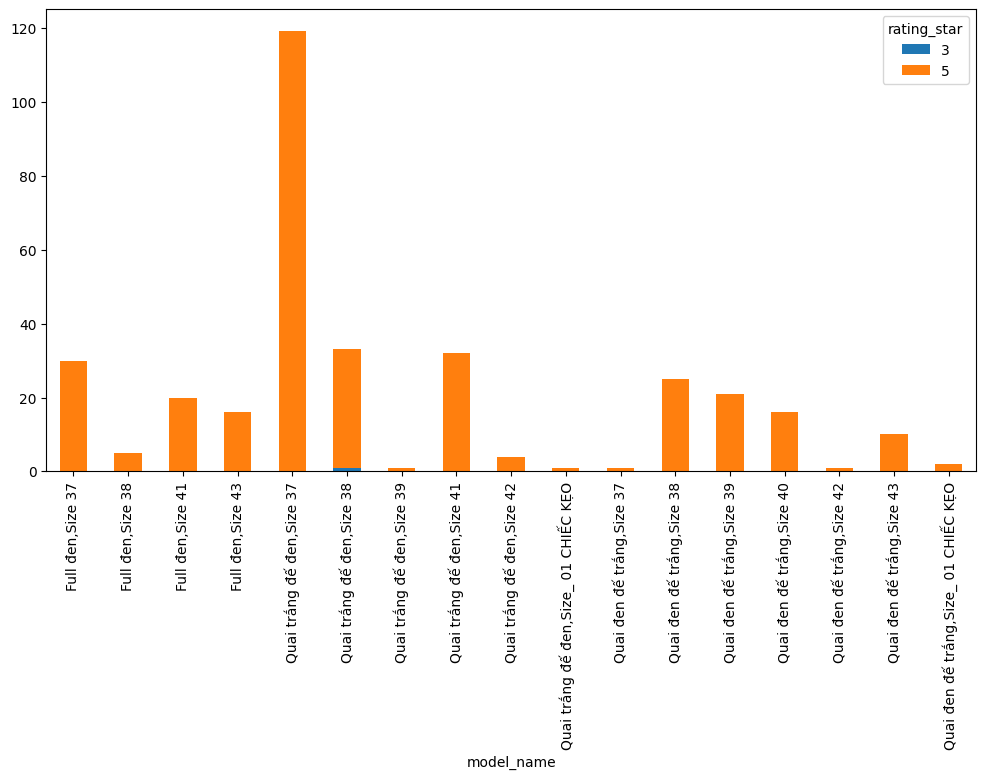

In [5]:
# df["modelid"].unique()
grouped = df.groupby(['model_name', 'rating_star']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

<Axes: ylabel='count'>

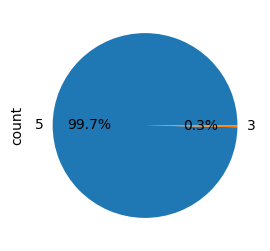

In [6]:
rating_counts = df['rating_star'].value_counts()
rating_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(3, 3))

In [8]:
all_reviews = ShopeeReviewScraper(22489557572, 543244849).get_reviews(99)

Fetching 50 reviews from https://shopee.vn/api/v2/item/get_ratings?exclude_filter=1&filter=1&filter_size=0&flag=1&fold_filter=0&itemid=22489557572&limit=50&offset=0&relevant_reviews=false&request_source=2&shopid=543244849&tag_filter=&type=0&variation_filters=...
Fetching 49 reviews from https://shopee.vn/api/v2/item/get_ratings?exclude_filter=1&filter=1&filter_size=0&flag=1&fold_filter=0&itemid=22489557572&limit=49&offset=50&relevant_reviews=false&request_source=2&shopid=543244849&tag_filter=&type=0&variation_filters=...


In [10]:
all_reviews = pd.DataFrame(all_reviews)
all_reviews.to_csv('reviews_with_comment.csv', index=False)